# Financial Time Series

## pandas Basics

In [1]:
import numpy as np
import pandas as pd

### First Steps with DataFrame Class

In [3]:
# pandas DataFrame class is designed to manage indexed and labeled data 
# Data itself can be provided in different shapes and types 
#    (list, tuple, ndarray, and dict objects).
# Create DataFrame object

df = pd.DataFrame([10, 20, 30, 40], columns=['numbers'],
                  index=['a', 'b', 'c', 'd'])
df

,numbers
a,10
b,20
c,30
d,40


In [4]:
# There is an index that can take on different formats 
# (e.g., numbers, strings, time information).

df.index  # the index values

Index(['a', 'b', 'c', 'd'], dtype='object')

In [5]:
# Data is organized in columns, which can have custom names

df.columns  # the column names

Index(['numbers'], dtype='object')

In [9]:
df.ix['c']  # selection via index
#   print(df.ix.__doc__)

numbers    30
Name: c, dtype: int64

In [10]:
df.ix[['a', 'd']]  # selection of multiple indices

,numbers
a,10
d,40


In [11]:
df.ix[df.index[1:3]]  # selection via Index object

,numbers
b,20
c,30


In [12]:
df.sum()  # sum per column

numbers    100
dtype: int64

In [13]:
df.apply(lambda x: x ** 2)  # square of every element

,numbers
a,100
b,400
c,900
d,1600


In [14]:
df ** 2  # again square, this time NumPy-like

,numbers
a,100
b,400
c,900
d,1600


In [15]:
df['floats'] = (1.5, 2.5, 3.5, 4.5)
  # new column is generated
df

,numbers,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [16]:
df['floats']  # selection of column

a    1.5
b    2.5
c    3.5
d    4.5
Name: floats, dtype: float64

In [17]:
df['names'] = pd.DataFrame(['Yves', 'Guido', 'Peter', 'Travis'],
                           index=['d', 'a', 'b', 'c'])
df

,numbers,floats,names
a,10,1.5,Guido
b,20,2.5,Peter
c,30,3.5,Travis
d,40,4.5,Yves


In [20]:
df.append({'numbers': 100, 'floats': 5.75, 'names': 'Henry'},
               ignore_index=True)
    # temporary object;    df not changed  !!
    # the index gets replaced by a simple numbered index

#  df

,numbers,floats,names
0,10,1.50,Guido
1,20,2.50,Peter
2,30,3.50,Travis
3,40,4.50,Yves
4,100,5.75,Henry


In [21]:
# It is  better to append a DataFrame object, 
# providing the appropriate index information

df = df.append(pd.DataFrame({'numbers': 100, 'floats': 5.75,
                             'names': 'Henry'}, index=['z',]))
df

,floats,names,numbers
a,1.50,Guido,10
b,2.50,Peter,20
c,3.50,Travis,30
d,4.50,Yves,40
z,5.75,Henry,100


In [22]:
# The following code  adds a new column, but with a slightly different index.
# Pandas by default accepts only values for those indices that already exist. 
# We lose the value for the index y and have a NaN value 
# (i.e., “Not a Number”) at index position z.

df.join(pd.DataFrame([1, 4, 9, 16, 25],
            index=['a', 'b', 'c', 'd', 'y'],
            columns=['squares',]))
  # temporary object

,floats,names,numbers,squares
a,1.50,Guido,10,1.0
b,2.50,Peter,20,4.0
c,3.50,Travis,30,9.0
d,4.50,Yves,40,16.0
z,5.75,Henry,100,NaN


In [23]:
# we use how=“outer” to use the union of all values from both indices

df = df.join(pd.DataFrame([1, 4, 9, 16, 25],
                    index=['a', 'b', 'c', 'd', 'y'],
                    columns=['squares',]),
                    how='outer')
df

,floats,names,numbers,squares
a,1.50,Guido,10.0,1.0
b,2.50,Peter,20.0,4.0
c,3.50,Travis,30.0,9.0
d,4.50,Yves,40.0,16.0
y,NaN,NaN,NaN,25.0
z,5.75,Henry,100.0,NaN


In [24]:
df[['numbers', 'squares']].mean()
  # column-wise mean

numbers    40.0
squares    11.0
dtype: float64

In [25]:
df[['numbers', 'squares']].std()
  # column-wise standard deviation

numbers    35.355339
squares     9.669540
dtype: float64

### Second Steps with DataFrame Class

In [26]:
import numpy as np
import pandas as pd

In [27]:
# Let's generate a numpy.ndarry with, with  nine rows and four columns 
# of  pseudorandom, standard normally distributed numbers

a = np.random.standard_normal((9, 4))
a.round(6)

array([[-0.873502, -0.181518, -1.00754 ,  1.169338],
       [-0.58707 ,  0.511014,  1.187308,  2.64094 ],
       [ 0.170314, -0.240261,  0.066821,  1.445502],
       [ 0.592607, -0.378034, -0.649862, -0.606795],
       [-1.824358,  1.032427,  0.430457, -1.095211],
       [-0.82538 , -0.171953,  0.629528,  0.601883],
       [ 0.241524,  0.905131,  0.411498, -0.073473],
       [-0.974406,  1.080573, -0.221565,  0.42142 ],
       [ 0.355221,  0.225342, -0.52567 , -2.128876]])

In [28]:
df = pd.DataFrame(a)
df

,0,1,2,3
0,-0.873502,-0.181518,-1.007540,1.169338
1,-0.587070,0.511014,1.187308,2.640940
2,0.170314,-0.240261,0.066821,1.445502
3,0.592607,-0.378034,-0.649862,-0.606795
4,-1.824358,1.032427,0.430457,-1.095211
5,-0.825380,-0.171953,0.629528,0.601883
6,0.241524,0.905131,0.411498,-0.073473
7,-0.974406,1.080573,-0.221565,0.421420
8,0.355221,0.225342,-0.525670,-2.128876


In [ ]:
#  Parameters of DataFrame function
# Parameter Format                   Description
# --------- ------                   -----------
# data      ndarray/dict/DataFrame   Data for DataFrame; dict can contain Series, ndarrays, lists
# index     Index/array-like         Index to use; defaults to range(n)
# columns   Index/array-like         Column headers to use; defaults to range(n)
# dtype     dtype, default None      Data type to use/force; otherwise, it is inferred
# copy      bool, default None       Copy data from inputs

# e.g. pd.DataFrame([10, 20, 30, 40], columns=['numbers'],index=['a', 'b', 'c', 'd'])

In [29]:
df.columns = [['No1', 'No2', 'No3', 'No4']]
df

,No1,No2,No3,No4
0,-0.873502,-0.181518,-1.007540,1.169338
1,-0.587070,0.511014,1.187308,2.640940
2,0.170314,-0.240261,0.066821,1.445502
3,0.592607,-0.378034,-0.649862,-0.606795
4,-1.824358,1.032427,0.430457,-1.095211
5,-0.825380,-0.171953,0.629528,0.601883
6,0.241524,0.905131,0.411498,-0.073473
7,-0.974406,1.080573,-0.221565,0.421420
8,0.355221,0.225342,-0.525670,-2.128876


In [30]:
df['No2'][3]  # value in column No2 at index position 3

-0.37803352807605817

In [35]:
# Now, generate new index:

# assume that our nine data entries in the four columns correspond to
# month-end data, beginning in January 2015.

# PARAMETERRS OF date_range
# start = string/datetime
# end   = string/datetime
# freq = 'M'     Month end frequency  (See Table 6.3)
#    B, C, D, W, M, BM, MS, BMS, Q, BQ,QS, BQS, A, BA, AS, BAS, , H, T, S, L, U
# periods = 9    number of periods 
# tz    = string representing timezine


dates = pd.date_range(start='2015-1-1', periods=9, freq='M')
dates

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30'],
              dtype='datetime64[ns]', freq='M')

In [36]:
# we assign the newly generated DatetimeIndex 
# as the new Index object to the DataFrame object

df.index = dates
df

,No1,No2,No3,No4
2015-01-31,-0.873502,-0.181518,-1.007540,1.169338
2015-02-28,-0.587070,0.511014,1.187308,2.640940
2015-03-31,0.170314,-0.240261,0.066821,1.445502
2015-04-30,0.592607,-0.378034,-0.649862,-0.606795
2015-05-31,-1.824358,1.032427,0.430457,-1.095211
2015-06-30,-0.825380,-0.171953,0.629528,0.601883
2015-07-31,0.241524,0.905131,0.411498,-0.073473
2015-08-31,-0.974406,1.080573,-0.221565,0.421420
2015-09-30,0.355221,0.225342,-0.525670,-2.128876


In [37]:
# You can generate a DataFrame object in general from an ndarray object. 
#   ndarray --> DataFrame
# You can also generate an ndarray object out of a DataFrame 
# by using the function array of NumPy.
#   DataFrame --> ndarray

np.array(df).round(6)

array([[-0.873502, -0.181518, -1.00754 ,  1.169338],
       [-0.58707 ,  0.511014,  1.187308,  2.64094 ],
       [ 0.170314, -0.240261,  0.066821,  1.445502],
       [ 0.592607, -0.378034, -0.649862, -0.606795],
       [-1.824358,  1.032427,  0.430457, -1.095211],
       [-0.82538 , -0.171953,  0.629528,  0.601883],
       [ 0.241524,  0.905131,  0.411498, -0.073473],
       [-0.974406,  1.080573, -0.221565,  0.42142 ],
       [ 0.355221,  0.225342, -0.52567 , -2.128876]])

### Basic Analytics

In [38]:
df.sum()   # column-wise sums

No1   -3.725049
No2    2.782723
No3    0.320977
No4    2.374729
dtype: float64

In [39]:
df.mean()   # column-wise means

No1   -0.413894
No2    0.309191
No3    0.035664
No4    0.263859
dtype: float64

In [40]:
df.cumsum()  #column-wise cumulative sums

,No1,No2,No3,No4
2015-01-31,-0.873502,-0.181518,-1.007540,1.169338
2015-02-28,-1.460571,0.329496,0.179769,3.810278
2015-03-31,-1.290257,0.089235,0.246590,5.255780
2015-04-30,-0.697650,-0.288798,-0.403272,4.648986
2015-05-31,-2.522008,0.743629,0.027185,3.553775
2015-06-30,-3.347388,0.571676,0.656713,4.155657
2015-07-31,-3.105864,1.476807,1.068212,4.082184
2015-08-31,-4.080270,2.557381,0.846647,4.503605
2015-09-30,-3.725049,2.782723,0.320977,2.374729


In [42]:
df.describe()   # a number of often-used statistics for numerical data sets
                # By default percentiles is [.25, .5, .75], 
                # returning the 25th, 50th, and 75th percentiles.

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,-0.413894,0.309191,0.035664,0.263859
std,0.797621,0.588162,0.699690,1.433957
min,-1.824358,-0.378034,-1.007540,-2.128876
25%,-0.873502,-0.181518,-0.525670,-0.606795
50%,-0.587070,0.225342,0.066821,0.421420
75%,0.241524,0.905131,0.430457,1.169338
max,0.592607,1.080573,1.187308,2.640940


In [43]:
# You can  apply the majority of NumPy universal functions to DataFrame objects

np.sqrt(df)

,No1,No2,No3,No4
2015-01-31,NaN,NaN,NaN,1.081359
2015-02-28,NaN,0.714853,1.089637,1.625097
2015-03-31,0.412692,NaN,0.258498,1.202290
2015-04-30,0.769810,NaN,NaN,NaN
2015-05-31,NaN,1.016084,0.656092,NaN
2015-06-30,NaN,NaN,0.793428,0.775811
2015-07-31,0.491451,0.951384,0.641481,NaN
2015-08-31,NaN,1.039506,NaN,0.649169
2015-09-30,0.596004,0.474702,NaN,NaN


In [44]:
# pandas leaves out the NaN values and only works with the other available values

np.sqrt(df).sum()

No1    2.269957
No2    4.196530
No3    3.439137
No4    5.333727
dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019577E29C50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000019577E6E9E8>], dtype=object)

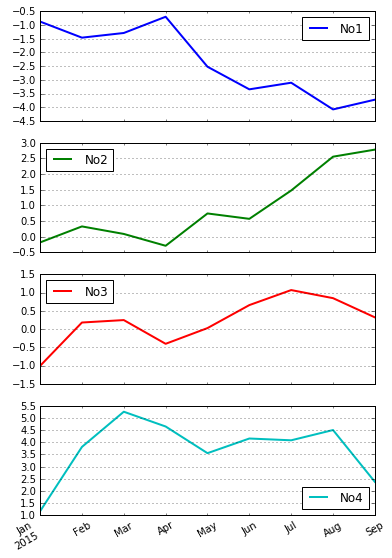

In [51]:
# Plotting of data
# pandas provides a wrapper around matplotplib, specifically designed for DataFrame objects

# Parameters of plot method are listed in table 6.4
#  subplots  Boolean, default False    Plot columns in subplots
#  grid      Boolean, default False    Horizontal and vertical grid lines
#  title     String, default None      Title for the plot
#  legend    Boolean, default True     Legend of labels
#  logx      Boolean, default False    Logarithmic scaling of x-axis
#  logy      Boolean, default False    Logarithmic scaling of y-axis
#  xlim      2-tuple, list             Boundaries for x-axis
#  ylim      2-tuple, list             Boundaries for y-axis
#    etc...

%matplotlib inline
df.cumsum().plot(lw=2.0,  # subplots = True, figsize=(6,10),
                 grid = True)
# title: Line plot of a DataFrame object

### TimeSeries Class

In [52]:
# we have worked mainly with the pandas DataFrame class

type(df)

pandas.core.frame.DataFrame

In [53]:
# there is  a dedicated Series class. We get a Series object, 
# for example, when selecting a single column from our DataFrame object

df['No1']

2015-01-31   -0.873502
2015-02-28   -0.587070
2015-03-31    0.170314
2015-04-30    0.592607
2015-05-31   -1.824358
2015-06-30   -0.825380
2015-07-31    0.241524
2015-08-31   -0.974406
2015-09-30    0.355221
Freq: M, Name: No1, dtype: float64

In [54]:
type(df['No1'])

pandas.core.series.Series

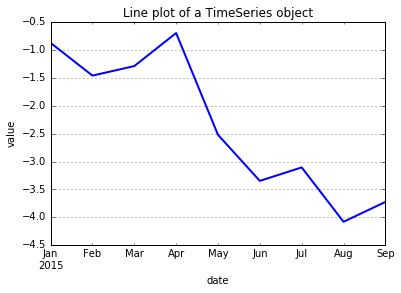

In [55]:
# we can plot Series objets
# style = 'b'     blue line   

%matplotlib inline
import matplotlib.pyplot as plt
df['No1'].cumsum().plot(style='b', lw=2.)
plt.xlabel('date')
plt.ylabel('value')
plt.grid()
plt.title("Line plot of a TimeSeries object")


### GroupBy Operations

In [56]:
# pandas has powerful and flexible grouping capabilities
# similar to grouping in SQL as well as pivot tables in Microsoft Excel

# To have something to group by, we add a column 
# indicating the quarter the respective data

df['Quarter'] = ['Q1', 'Q1', 'Q1', 'Q2', 'Q2', 'Q2', 'Q3', 'Q3', 'Q3']
df

,No1,No2,No3,No4,Quarter
2015-01-31,-0.873502,-0.181518,-1.007540,1.169338,Q1
2015-02-28,-0.587070,0.511014,1.187308,2.640940,Q1
2015-03-31,0.170314,-0.240261,0.066821,1.445502,Q1
2015-04-30,0.592607,-0.378034,-0.649862,-0.606795,Q2
2015-05-31,-1.824358,1.032427,0.430457,-1.095211,Q2
2015-06-30,-0.825380,-0.171953,0.629528,0.601883,Q2
2015-07-31,0.241524,0.905131,0.411498,-0.073473,Q3
2015-08-31,-0.974406,1.080573,-0.221565,0.421420,Q3
2015-09-30,0.355221,0.225342,-0.525670,-2.128876,Q3


In [58]:
# Now, we can group by the “Quarter” column

groups = df.groupby('Quarter')

In [59]:
# get the mean of every group bucket

groups.mean()

,No1,No2,No3,No4
Quarter,,,,
Q1,-0.430086,0.029745,0.082197,1.751927
Q2,-0.685710,0.160814,0.136708,-0.366708
Q3,-0.125887,0.737016,-0.111912,-0.593643


In [60]:
# get the max of every group bucket

groups.max()

,No1,No2,No3,No4
Quarter,,,,
Q1,0.170314,0.511014,1.187308,2.640940
Q2,0.592607,1.032427,0.629528,0.601883
Q3,0.355221,1.080573,0.411498,0.421420


In [61]:
# get the size of every group bucket

groups.size()

Quarter
Q1    3
Q2    3
Q3    3
dtype: int64

In [63]:
# Grouping can also be done with multiple columns. 
# add another column, indicating whether the month of the index date is odd or even

df['Odd_Even'] = ['Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even',
                  'Odd', 'Even', 'Odd']
df

,No1,No2,No3,No4,Quarter,Odd_Even
2015-01-31,-0.873502,-0.181518,-1.007540,1.169338,Q1,Odd
2015-02-28,-0.587070,0.511014,1.187308,2.640940,Q1,Even
2015-03-31,0.170314,-0.240261,0.066821,1.445502,Q1,Odd
2015-04-30,0.592607,-0.378034,-0.649862,-0.606795,Q2,Even
2015-05-31,-1.824358,1.032427,0.430457,-1.095211,Q2,Odd
2015-06-30,-0.825380,-0.171953,0.629528,0.601883,Q2,Even
2015-07-31,0.241524,0.905131,0.411498,-0.073473,Q3,Odd
2015-08-31,-0.974406,1.080573,-0.221565,0.421420,Q3,Even
2015-09-30,0.355221,0.225342,-0.525670,-2.128876,Q3,Odd


In [64]:
# grouping based on two columns simultaneously

groups = df.groupby(['Quarter', 'Odd_Even'])

In [65]:
groups.size()

Quarter  Odd_Even
Q1       Even        1
         Odd         2
Q2       Even        2
         Odd         1
Q3       Even        1
         Odd         2
dtype: int64

In [66]:
groups.mean()

No1       No2       No3       No4
Quarter Odd_Even                                        
Q1      Even     -0.587070  0.511014  1.187308  2.640940
        Odd      -0.351594 -0.210890 -0.470359  1.307420
Q2      Even     -0.116386 -0.274993 -0.010167 -0.002456
        Odd      -1.824358  1.032427  0.430457 -1.095211
Q3      Even     -0.974406  1.080573 -0.221565  0.421420
        Odd       0.298373  0.565237 -0.057086 -1.101174

## Financial Data

In [2]:
import mpl_finance

Let's look at some financial data

In [1]:
import matplotlib.finance as mpf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

start = (2016, 1, 1)
end = (2016, 3, 31)
quotes = mpf.quotes_historical_yahoo_ohlc('FB', start, end)
y = np.array(quotes)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(8, 10))
mpf.candlestick_ohlc(ax1, quotes, width=0.6, colorup='b', colordown='r')
ax1.set_title('FB stock')
ax1.set_ylabel('index level')
ax1.grid(True)
ax1.xaxis_date()

plt.plot(y[:,0],y[:, 1], lw=1.5, label='open')  # open column
plt.plot(y[:,0],y[:, 2], lw=1.5, label='high')  # high column
plt.plot(y[:,0],y[:, 3], lw=1.5, label='low')   # low column
plt.plot(y[:,0],y[:, 4], lw=1.5, label='close')  # close column
ax2.set_ylabel('price')
ax2.grid(True)
ax2.legend(loc=0) 
ax2.autoscale_view()
plt.setp(plt.gca().get_xticklabels(), rotation=30)

ModuleNotFoundError: No module named 'matplotlib.finance'

In [3]:
# use the pandas built-in function DataReader to retrieve stock price data 
# from Yahoo! Finance, analyze the data, and generate different plots of it

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import pandas.io.data as web
import pandas_datareader.data as web

In [4]:
# retrieve stock price information for the German DAX index 
# from Yahoo! Finance with a single line of code

# name            String               Name of data set — generally, the ticker symbol
# data_source     e.g., 'yahoo'        Data source (yahoo, google, oecd, eurostat, FRED)
# start          String/datetime/None  Left boundary of range
# end            String/datetime/None  Right boundary of range (default today)

DAX = web.DataReader(name='^GDAXI', data_source='yahoo',
                     start='2000-1-1')
DAX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4280 entries, 2000-01-03 to 2016-10-19
Data columns (total 6 columns):
Open         4280 non-null float64
High         4280 non-null float64
Low          4280 non-null float64
Close        4280 non-null float64
Volume       4280 non-null int64
Adj Close    4280 non-null float64
dtypes: float64(5), int64(1)
memory usage: 234.1 KB


In [5]:
DAX.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-10-13,10425.790039,10430.830078,10349.059570,10414.070312,95793600,10414.070312
2016-10-14,10450.059570,10615.299805,10449.469727,10580.379883,98226700,10580.379883
2016-10-17,10544.690430,10583.700195,10491.280273,10503.570312,61818000,10503.570312
2016-10-18,10560.139648,10657.339844,10543.690430,10631.549805,88963500,10631.549805
2016-10-19,10626.990234,10672.219727,10587.709961,10645.679688,73697200,10645.679688


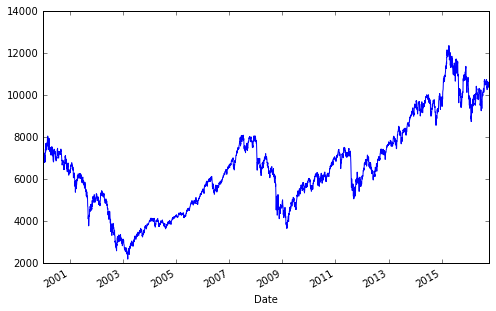

In [6]:
# plot the index history

DAX['Close'].plot(figsize=(8, 5))
# title: Historical DAX index levels

In [8]:
# LOG returns based on the daily closing prices

# pandas allows for vectorized mathematical operations.

# instead of generating a new, empty column and then
# iterating over all indexes to calculate the single 
# log return values step by step, 

# DAX['Return'] = 0.0     # generate empty column
# for i in range(1, len(DAX)):
#      DAX['Return'][i] = np.log(DAX['Close'][i] / DAX['Close'][i-1])
#  

# we can use vectorized code to reach the same result without looping.

# the shift method is useful; it shifts Series or whole DataFrame objects 
# relative to their index, forward as well as backward

%time DAX['Return'] = np.log(DAX['Close'] / DAX['Close'].shift(1))

# we need to shift the Close column by one day (one index position)

Wall time: 4 ms


In [9]:
DAX[['Close', 'Return']].tail()

,Close,Return
Date,,
2016-10-13,10414.070312,-0.010412
2016-10-14,10580.379883,0.015844
2016-10-17,10503.570312,-0.007286
2016-10-18,10631.549805,0.012111
2016-10-19,10645.679688,0.001328


In [11]:
# Example : add and delete a column

DAX['Ret_loop'] = 0.0
DAX.info()
# del DAX['Ret_loop']

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4280 entries, 2000-01-03 to 2016-10-19
Data columns (total 8 columns):
Open         4280 non-null float64
High         4280 non-null float64
Low          4280 non-null float64
Close        4280 non-null float64
Volume       4280 non-null int64
Adj Close    4280 non-null float64
Ret_loop     4280 non-null float64
Return       4279 non-null float64
dtypes: float64(7), int64(1)
memory usage: 300.9 KB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002126DC39198>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000002126DD55940>], dtype=object)

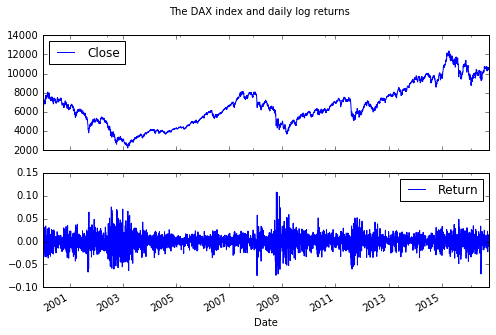

In [14]:
DAX[['Close', 'Return']].plot(subplots=True, style='b',
        figsize=(8, 5), title="The DAX index and daily log returns")

# Volatility clustering
#   Volatility is not constant over time; there are periods of high volatility 
#   (both highly positive and negative returns) as well as periods of low volatility.
# Leverage effect
#   Generally, volatility and stock market returns are negatively correlated; 
#   when markets come down volatility rises, and vice versa.

In [15]:
# moving averages - so-called trends. 
# A moving average is  calculated with the rolling_mean function of pandas 
# (there are other “rolling” functions as well, 
# like rolling_max, rolling_min, and rolling_corr, rolling_std):

# DAX['42d'] = pd.rolling_mean(DAX['Close'], window=42)
# DAX['252d'] = pd.rolling_mean(DAX['Close'], window=252)
DAX['42d'] = DAX['Close'].rolling(center=False, window=42).mean()
DAX['252d'] = DAX['Close'].rolling(center=False, window=252).mean()


In [16]:
DAX[['Close', '42d', '252d']].tail()

,Close,42d,252d
Date,,,
2016-10-13,10414.070312,10535.387416,10171.774402
2016-10-14,10580.379883,10533.095261,10173.663094
2016-10-17,10503.570312,10532.283366,10175.009366
2016-10-18,10631.549805,10532.962402,10176.929486
2016-10-19,10645.679688,10535.374767,10178.546867


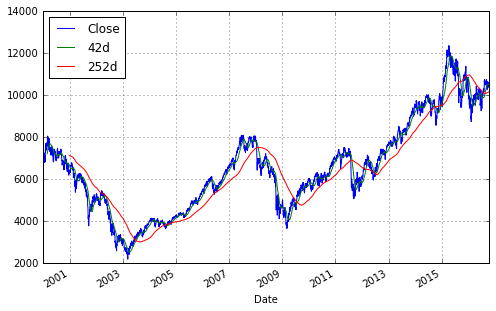

In [18]:
# A typical stock price chart with the two trends included

DAX[['Close', '42d', '252d']].plot(figsize=(8, 5), grid=True)
# title: The DAX index and moving averages

In [19]:
# the moving historical standard deviation of the log returns
#    moving annual volatility

import math
# DAX['Mov_Vol'] = pd.rolling_std(DAX['Return'],window=252) * math.sqrt(252)
DAX['Mov_Vol'] = DAX['Return'].rolling(center=False,window=252).std() * math.sqrt(252)
 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002126EFBE6D8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000002126EFDE6A0>], dtype=object)

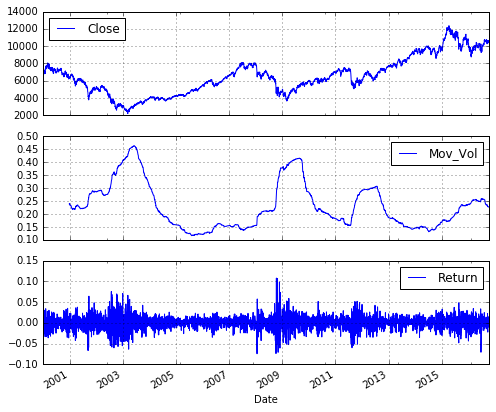

In [20]:
DAX[['Close', 'Mov_Vol', 'Return']].plot(subplots=True, style='b',
                                         figsize=(8, 7),grid=True)

# title: The DAX index and moving, annualized volatility

# see the leverage effect:
# the historical moving volatility tends to increase when markets come down, 
# and to decrease when they rise:

              Open    High     Low   Close     Volume
Date                                                 
2014-04-08  542.60  555.00  541.61  554.90  3152406.0
2014-04-09  559.62  565.37  552.95  564.14  3324742.0
2014-04-10  565.00  565.00  539.90  540.95  4027743.0
2014-04-11  532.55  540.00  526.53  530.60  3916171.0
2014-04-14  538.25  544.10  529.56  532.52  2568020.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002126F0FE780>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000002126F1CE160>], dtype=object)

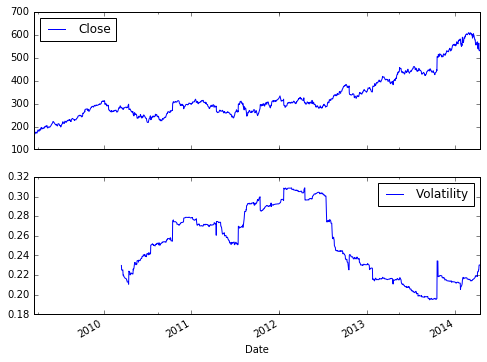

In [22]:
# Google closing prices and yearly volatility

import numpy as np
import pandas as pd
# import pandas.io.data as web
import pandas_datareader.data as web

goog = web.DataReader('GOOG', data_source='google', start='3/14/2009', end='4/14/2014')
print(goog.tail())

goog['Log_Ret'] = np.log(goog['Close'] / goog['Close'].shift(1))
goog['Volatility'] = goog['Log_Ret'].rolling(center=False, window=252).std() * np.sqrt(252)

goog[['Close', 'Volatility']].plot(subplots=True,color='blue',figsize=(8,6))

## Regression Analysis - OLS DOES NOT WORK ANY MORE!!!

In [1]:
# Let's use (linear) ordinary least-squares regression (OLS)
import pandas as pd
import numpy as np
from urllib.request import urlretrieve
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
!dir "./data/"

 Volume in drive C is System
 Volume Serial Number is 0EAB-AF41

 Directory of C:\Users\Roman\Desktop\CPS600\Fall 2016\MyLectures\08\data

10/13/2016  05:46 PM    <DIR>          .
10/13/2016  05:46 PM    <DIR>          ..
10/19/2016  09:20 PM           688,500 es.txt
10/19/2016  09:25 PM           539,080 es50.txt
10/19/2016  09:20 PM           363,485 vs.txt
               3 File(s)      1,591,065 bytes
               2 Dir(s)  55,113,207,808 bytes free


In [3]:
# EURO STOXX 50
#    Historical daily closing values of the EURO STOXX 50 index, 
#    composed of  European blue-chip stocks
# VSTOXX
#    Historical daily closing data for the VSTOXX volatility index, 
#    calculated on the basis of volatilities implied by options on the EURO STOXX 50 index

# we retrieve files from the Web and save them in a folder called data

es_url = 'http://www.stoxx.com/download/historical_values/hbrbcpe.txt'
vs_url = 'http://www.stoxx.com/download/historical_values/h_vstoxx.txt'
urlretrieve(es_url, './data/es.txt')
urlretrieve(vs_url, './data/vs.txt')
!dir  "./data/"

 Volume in drive C is System
 Volume Serial Number is 0EAB-AF41

 Directory of C:\Users\Roman\Desktop\CPS600\Fall 2016\MyLectures\08\data

10/13/2016  05:46 PM    <DIR>          .
10/13/2016  05:46 PM    <DIR>          ..
10/22/2016  05:40 PM           688,500 es.txt
10/19/2016  09:25 PM           539,080 es50.txt
10/22/2016  05:40 PM           363,485 vs.txt
               3 File(s)      1,591,065 bytes
               2 Dir(s)  55,111,725,056 bytes free


In [5]:
# read the whole data set and removes all blanks

lines = open('./data/es.txt', 'r').readlines()
lines = [line.replace(' ', '') for line in lines]

In [6]:
# printing the first couple of lines of the downloaded data set

lines[:6]

['PriceIndices-EUROCurrency\n',
 'Date;Blue-Chip;Blue-Chip;Broad;Broad;ExUK;ExEuroZone;Blue-Chip;Broad\n',
 ';Europe;Euro-Zone;Europe;Euro-Zone;;;Nordic;Nordic\n',
 ';SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n']

In [7]:
# Make some necessary changes:

# 1) There are a couple of additional header lines that we do not need for the import.
# 2) from December 27, there suddenly appears an additional semicolon 
#      at the end of each data row

for line in lines[3883:3890]:
    print (line[41:])

317.10;267.23;5268.36;363.19

322.55;272.18;5360.52;370.94

322.69;272.95;5360.52;370.94

327.57;277.68;5479.59;378.69;

329.94;278.87;5585.35;386.99;

326.77;272.38;5522.25;380.09;

332.62;277.08;5722.57;396.12;



In [8]:
# To make the data set easier to import, we do the following:
# 1. Generate a new text file.
# 2. Delete unneeded header lines.
# 3. Write an appropriate new header line to the new file.
# 4. Add a helper column, DEL (to catch the trailing semicolons).
# 5. Write all data rows to the new file.


new_file = open('./data/es50.txt', 'w')
    # opens a new file
new_file.writelines('date' + lines[3][:-1]
                    + ';DEL' + lines[3][-1])
    # writes the corrected third line of the orginal file
    # as first line of new file
new_file.writelines(lines[4:])
    # writes the remaining lines of the orginial file
new_file.close()

In [11]:
new_lines = open('./data/es50.txt', 'r').readlines()
new_lines[:5]

['date;SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF;DEL\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '02.01.1987;770.89;891.78;82.57;97.80;97.43;69.37;647.62;65.81\n',
 '05.01.1987;771.89;898.33;82.82;98.60;98.19;69.16;649.94;65.82\n']

In [12]:
es = pd.read_csv('./data/es50.txt', index_col=0,
                 parse_dates=True, sep=';', dayfirst=True)

In [13]:
np.round(es.tail())

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF,DEL
date,,,,,,,,,
2016-09-28,2847.0,2991.0,343.0,324.0,408.0,350.0,9072.0,581.0,NaN
2016-09-29,2849.0,2992.0,343.0,324.0,408.0,351.0,9112.0,583.0,NaN
2016-09-30,2843.0,3002.0,343.0,325.0,408.0,350.0,9116.0,583.0,NaN
2016-10-03,2845.0,2998.0,343.0,325.0,408.0,351.0,9131.0,584.0,NaN
2016-10-04,2871.0,3030.0,346.0,328.0,411.0,354.0,9212.0,589.0,NaN


In [14]:
# delete DEL column

del es['DEL'] 
es.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7673 entries, 1986-12-31 to 2016-10-04
Data columns (total 8 columns):
SX5P    7673 non-null float64
SX5E    7673 non-null float64
SXXP    7673 non-null float64
SXXE    7673 non-null float64
SXXF    7673 non-null float64
SXXA    7673 non-null float64
DK5F    7673 non-null float64
DKXF    7673 non-null float64
dtypes: float64(8)
memory usage: 539.5 KB


In [15]:
# VSTOXX data set is already in a form such that it can be imported 
#  more easily into a DataFrame object

# Table 6-6. Parameters of read_csv function

# index_col    Integer     Number of index columns (sequence for multi-index)
# header       Integer     Number of header rows
# sep          String, default “,”      Delimiter to use
# dayfirst     Boolean, default False   For European date convention DD/MM
#    etc...

vs = pd.read_csv('./data/vs.txt', index_col=0, header=2,
                 parse_dates=True, sep=',', dayfirst=True)
vs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4357 entries, 1999-01-04 to 2016-02-12
Data columns (total 9 columns):
V2TX    4357 non-null float64
V6I1    3906 non-null float64
V6I2    4357 non-null float64
V6I3    4296 non-null float64
V6I4    4357 non-null float64
V6I5    4357 non-null float64
V6I6    4340 non-null float64
V6I7    4357 non-null float64
V6I8    4343 non-null float64
dtypes: float64(9)
memory usage: 340.4 KB


In [17]:
# To implement the regression analysis, we only need one column from each data set. 
# We generate a new DataFrame object within which we combine the two columns of
# interest.  Since VSTOXX data is only available from the beginning of January 1999,
# we only take data from that date on:


import datetime as dt
data = pd.DataFrame({'EUROSTOXX' :
                     es['SX5E'][es.index > dt.datetime(1999, 1, 1)]})
data = data.join(pd.DataFrame({'VSTOXX' :
                     vs['V2TX'][vs.index > dt.datetime(1999, 1, 1)]}))

In [18]:
# We  fill missing values with the last available values from the time series. 
# We call the fillna method, providing ffill (for forward fill) as the method parameter

data = data.fillna(method='ffill')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4554 entries, 1999-01-04 to 2016-10-04
Data columns (total 2 columns):
EUROSTOXX    4554 non-null float64
VSTOXX       4554 non-null float64
dtypes: float64(2)
memory usage: 106.7 KB


In [47]:
data.tail()

,EUROSTOXX,VSTOXX
date,,
2016-09-28,2991.11,35.6846
2016-09-29,2991.58,35.6846
2016-09-30,3002.24,35.6846
2016-10-03,2998.50,35.6846
2016-10-04,3029.50,35.6846


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A4FA0A390>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000021A4F13E898>], dtype=object)

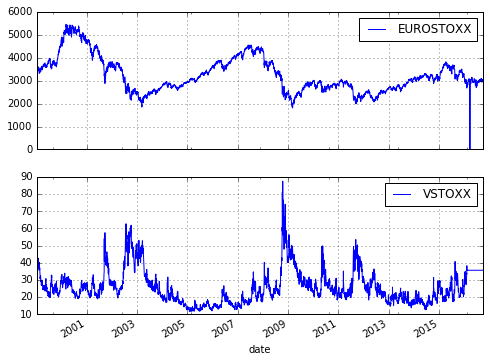

In [19]:
# Plot: there seems to be a negative correlation between the two indexes

%matplotlib inline
data.plot(subplots=True, grid=True, style='b', figsize=(8, 6))
# title: The EURO STOXX 50 Index and the VSTOXX volatility index

In [20]:
# Plot log returns  of the two financial time series

rets = np.log(data / data.shift(1)) 
rets.head()

,EUROSTOXX,VSTOXX
date,,
1999-01-04,NaN,NaN
1999-01-05,0.017228,0.489248
1999-01-06,0.022138,-0.165317
1999-01-07,-0.015723,0.256337
1999-01-08,-0.003120,0.021570


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A4F2380F0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000021A4F2C35C0>], dtype=object)

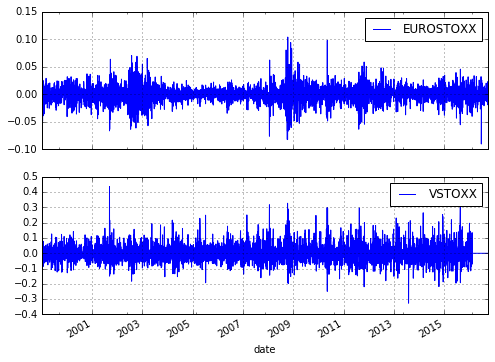

In [21]:
rets.plot(subplots=True, grid=True, style='b', figsize=(8, 6))
# title: Log returns of EURO STOXX 50 and VSTOXX

In [22]:
# We have everything together to implement the regression analysis. 
# The EURO STOXX 50 returns are taken as the independent variable 
# the VSTOXX returns are taken as the dependent variable
# OLS - ordinary least-squares regression


xdat = rets['EUROSTOXX']
ydat = rets['VSTOXX']
xdat.tail()
print(xdat.values[2:])

[ 0.02213799 -0.01572252 -0.00311964 ...,  0.003557   -0.00124651
  0.01028543]


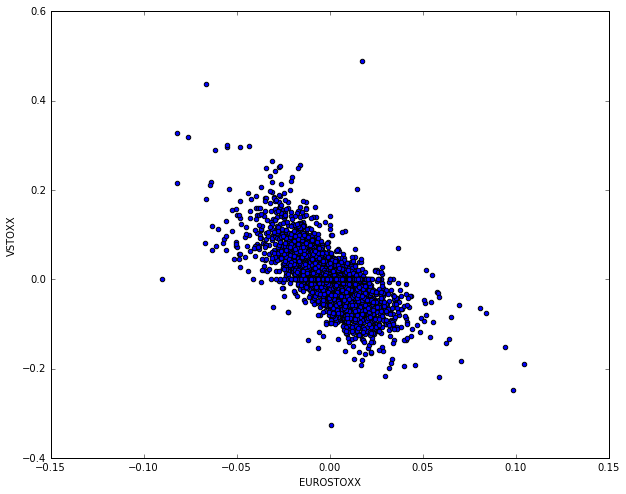

In [39]:
#  ordinary least-squares regression (OLS)

rets.plot(figsize=(10,8), x="EUROSTOXX", y="VSTOXX", kind='scatter') 
olsx = sm.OLS(ydat.values, xdat.values)
ols_fit = olsx.fit()

#  print(ols_fit.summary())
#  plt.plot(xdat[1:], ols_fit.fittedvalues[1:], 'r') 

In [40]:
# We can use the corr() function to derive the correlation values 
# between each column of values in the pandas DataFrame object 
#   EUROSTOXX is negatively correlated with VSTOXX
rets.corr()

,EUROSTOXX,VSTOXX
EUROSTOXX,1.000000,-0.724945
VSTOXX,-0.724945,1.000000


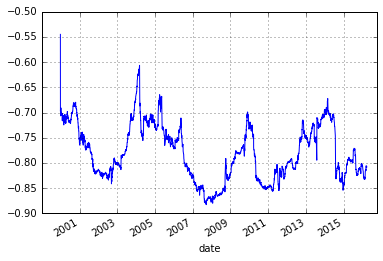

In [41]:
#  pd.rolling_corr(rets['EUROSTOXX'], rets['VSTOXX'], window=252).plot(grid=True, style='b')

rets['EUROSTOXX'].rolling(window=252).corr(other=rets['VSTOXX']).plot(grid=True, style='b')

# title: Rolling correlation between EURO STOXX 50 and VSTOXX

## High Frequency Data  

In [42]:
# how to cope with tick data instead of daily financial data

import numpy as np
import pandas as pd
import datetime as dt
from urllib.request import urlretrieve
%matplotlib inline

In [43]:
# The Norwegian online broker Netfonds provides tick data for a multitude of stocks, 
# in particular for American names

url1 = 'http://www.netfonds.no/quotes/posdump.php?'
url2 = 'date=%s%s%s&paper=NKE.N&csv_format=csv'
url = url1 + url2

In [44]:
# ADJUST DATES

year = '2016'
month = '10'
days = ['10', '11', '12', '13', '14']
  # dates might need to be updated

In [45]:
#We want to download, combine, and analyze a week’s worth of tick data for the Nike stock

NKE = pd.DataFrame()
for day in days:
    NKE = NKE.append(pd.read_csv(url % (year, month, day),
                       index_col=0, header=0, parse_dates=True))
NKE.columns = ['bid', 'bdepth', 'bdeptht', 'offer', 'odepth', 'odeptht']
  # shorter colummn names

In [46]:
NKE.tail()

,bid,bdepth,bdeptht,offer,odepth,odeptht
time,,,,,,
2016-10-14 22:59:01,51.55,100,100,51.77,100,100
2016-10-14 23:00:00,51.55,100,100,51.78,500,500
2016-10-14 23:05:44,51.65,300,300,51.78,500,500
2016-10-14 23:09:33,51.65,300,300,51.77,500,500
2016-10-14 23:17:00,51.65,300,300,51.75,500,500


In [47]:
NKE.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 57291 entries, 2016-10-10 10:00:02 to 2016-10-14 23:17:00
Data columns (total 6 columns):
bid        57291 non-null float64
bdepth     57291 non-null int64
bdeptht    57291 non-null int64
offer      57291 non-null float64
odepth     57291 non-null int64
odeptht    57291 non-null int64
dtypes: float64(2), int64(4)
memory usage: 3.1 MB


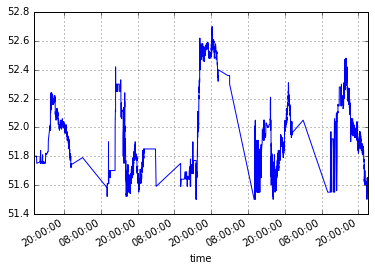

In [48]:
# show the bid columns graphically
# One can identify a number of periods without any 
# trading activity — i.e., times when the markets are closed

NKE['bid'].plot(grid=True)
# title: NKE stock tick data for a week

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A5127E160>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000021A5125EE10>], dtype=object)

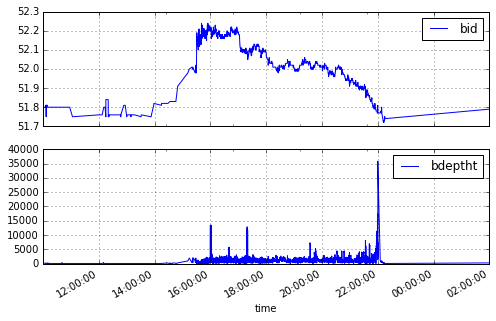

In [49]:
# show the trading activity for the first day in the sample and three hours of the second

# ADJUST DATES

to_plot = NKE[['bid', 'bdeptht']][
    (NKE.index > dt.datetime(2016, 10, 10, 0, 0))
 &  (NKE.index < dt.datetime(2016, 10, 11, 2, 59))]
to_plot.plot(subplots=True, style='b', figsize=(8, 5), grid=True)

# title: NKE stock tick data and volume for a trading day

In [50]:
# resample: remove irregularities in DatetimeIndex

NKE_resam = NKE.resample(rule='25min').mean()
np.round(NKE_resam.head(), 2)

,bid,bdepth,bdeptht,offer,odepth,odeptht
time,,,,,,
2016-10-10 10:00:00,51.80,127.87,127.87,52.64,500.00,500.00
2016-10-10 10:25:00,51.80,106.82,106.82,52.61,490.91,490.91
2016-10-10 10:50:00,51.79,100.00,100.00,52.46,500.00,500.00
2016-10-10 11:15:00,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-10 11:40:00,51.76,100.00,100.00,52.28,457.14,457.14


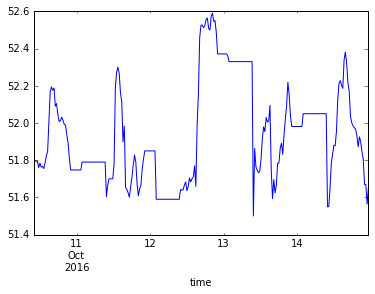

In [51]:
NKE_resam['bid'].fillna(method='ffill').plot()
# title: Resampled NKE stock tick data is smoother than above

In [52]:
# To conclude this section, we apply a custom-defined Python function to our new data set.
# The function we choose is arbitrary and does not make any economic sense here; it just
# mirrors the stock performance at a certain stock price level


def reversal(x):
    return 2 * 95 - x

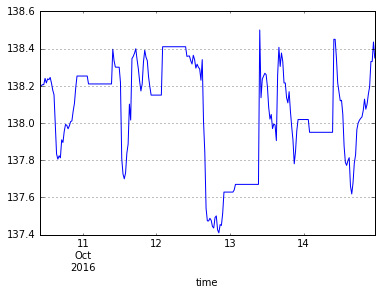

In [53]:
NKE_resam['bid'].fillna(method='ffill').apply(reversal).plot(grid=True)
# title: Resampled NKE stock tick data with function applied to it

## Documentation
* the home page of the pandas library: http://pandas.pydata.org
* comprehensive online documentation available at http://pandas.pydata.org/pandas-docs/stable/
* The documentation in PDF format with 1,500+ pages http://pandas.pydata.org/pandasdocs/stable/pandas.pdf